In [1]:
import os
from collections import defaultdict
import csv
from bs4 import BeautifulSoup
import re
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize


root_folder = "/Users/abhishekpanda/Downloads/Dissertation Abhishek Panda/Form 8-K html"

# FILTER FILES BASED ON CYBERSECURITY KEYWORDS
cyber_keywords = [
    "PHISH", "HACK", "HACKER", "COMPROMISE", "SECURITY BREACH", "COMPUTER BREACH",
    "DATA BREACH", "DISCLOSE BREACH", "BREACH DISCLOS", "COMPUTER VIRUS",
    "SECURITY VULNERABILITY", "SOFTWARE VULNERABL", "CYBERSECURITY", "CYBER SECURITY",
    "CYBERATTACK", "CYBER-ATTACK", "CYBER ATTACK", "CYBER-RELATED",
    "CYBER CRIME", "CYBERCRIME", "CYBER-CRIME"
]

filtered_files = []

# Traverse files
for dirpath, _, filenames in os.walk(root_folder):
    for filename in filenames:
        if filename.lower().endswith(".html"):
            full_path = os.path.join(dirpath, filename)
            try:
                with open(full_path, "r", encoding="ISO-8859-1") as file:
                    soup = BeautifulSoup(file.read(), "html.parser")
                    text = soup.get_text(separator=" ", strip=True).upper()
                    if any(word in text for word in cyber_keywords):
                        filtered_files.append(full_path)
            except Exception as e:
                print(f"Could not read {full_path}: {e}")

output_csv = "cyber_mention_files.csv"
with open(output_csv, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["filepath"])
    for path in filtered_files:
        writer.writerow([path])

print(f" {len(filtered_files)} matching files found")


# WORD LIST (Keyword groups)
word_lists = {
    "word_list01": ["PHISH"],
    "word_list02": ["HACK", "HACKER"],
    "word_list03": ["COMPROMISE"],
    "word_list04": ["SECURITY BREACH"],
    "word_list05": ["COMPUTER BREACH"],
    "word_list06": ["DATA BREACH"],
    "word_list07": ["DISCLOSE BREACH", "BREACH DISCLOS"],
    "word_list08": ["COMPUTER VIRUS"],
    "word_list09": ["SECURITY VULNERABILITY", "SOFTWARE VULNERABL"],
    "word_list10": ["CYBERSECURITY", "CYBER SECURITY"],
    "word_list11": ["CYBERATTACK", "CYBER-ATTACK", "CYBER ATTACK", "CYBER-RELATED"],
    "word_list12": ["CYBER CRIME", "CYBERCRIME", "CYBER-CRIME"],
    "word_list13": ["INTRUSION"],
    "word_list14": ["SECURITY MEASURE"],
    "word_list15": ["SECURITY INCIDENT"],
    "word_list16": ["IDENTITY THEFT"],
    "word_list17": ["NETWORK SECURITY"],
    "word_list18": ["DENIAL OF SERVICE"],
    "word_list19": ["MALWARE", "SPYWARE"],
    "word_list20": ["RANSOMWARE"],
    "word_list21": ["ENCRYPT", "FIREWALL", "ANTI VIRUS", "ANTIVIRUS", "ANTI-VIRUS"],
    "word_list22": ["BLACKHAT", "BLACK HAT"],
    "word_list23": ["DARKNET", "DARK NET", "DARK FORUM", "DARKWEB"],
    "word_list24": ["WORM"],
    "word_list25": ["ACCESS CONTROL"],
    "word_list26": ["SECURITY MONITOR"],
    "word_list27": ["SECURITY MANAG", "CYBER RISK MANAG", "CYBER-RISK MANAG", "SECURITY MONITOR",
                    "SECURITY POLICY", "IT SECURITY", "IT SAFETY", "INFORMATION SAFETY"],
    "word_list28": ["CYBER-RISK", "CYBER RISK"],
    "word_list29": ["INFORMATION RISK", "IT RISK"],
    "word_list30": ["IT SECURITY", "INFORMATION SECURITY", "INFOSEC", "INFO SEC",
                    "SYSTEMS SECURITY", "INFORMATION SYSTEMS SECURITY"],
    "word_list31": ["CYBERFRAUD", "CYBER FRAUD"],
    "word_list32": ["SECURITY EXPEN", "CYBERSECURITY EXPEN"],
    "word_list33": ["BLACKLIST", "BLACK LIST"],
    "word_list34": ["BOTNET", "BOT NET"],
    "word_list35": ["CYBER TERROR", "CYBER TERRORISM"]
}

total_counts = defaultdict(int)

with open("cyber_mention_files.csv", newline='', encoding="utf-8") as f:
    reader = csv.DictReader(f)

    for row in reader:
        filepath = row["filepath"]

        try:
            with open(filepath, "r", encoding="ISO-8859-1") as file:
                soup = BeautifulSoup(file.read(), "html.parser")
                text = soup.get_text(separator=" ", strip=True).upper()

                for group, keywords in word_lists.items():
                    total_counts[group] += sum(text.count(word) for word in keywords)

        except Exception as e:
            print(f"Error processing {filepath}: {e}")


print("Total Cybersecurity Term Counts:")
for group, count in sorted(total_counts.items()):
    print(f"{group}: {count} match(es)")

'''  
# N GRAMS
from sklearn.feature_extraction.text import CountVectorizer

documents = []

with open("cyber_mention_files.csv", newline='', encoding="utf-8") as f:
    reader = csv.DictReader(f)

    for row in reader:
        filepath = row["filepath"]
        try:
            with open(filepath, "r", encoding="ISO-8859-1") as file:
                soup = BeautifulSoup(file.read(), "html.parser")
                text = soup.get_text(separator=" ", strip=True)
                documents.append(text)
        except Exception as e:
            print(f"Error reading {filepath}: {e}")


# n-gram frequencies
def get_top_ngrams(documents, ngram_range, top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(documents)
    sum_words = X.sum(axis=0)
    freqs = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(freqs, key=lambda x: x[1], reverse=True)[:top_n]


# Top 10 
print("Top 10 Unigrams:")
for ngram, count in get_top_ngrams(documents, (1, 1)):
    print(f"{ngram}: {count}")

print("Top 10 Bigrams:")
for ngram, count in get_top_ngrams(documents, (2, 2)):
    print(f"{ngram}: {count}")

print("Top 10 Trigrams:")
for ngram, count in get_top_ngrams(documents, (3, 3)):
    print( f"{ngram}: {count}")
'''

nltk.download('punkt')

# Keywords
cyber_keywords = [
    "PHISH", "HACK", "HACKER", "COMPROMISE", "SECURITY BREACH", "COMPUTER BREACH",
    "DATA BREACH", "DISCLOSE BREACH", "BREACH DISCLOS", "COMPUTER VIRUS",
    "SECURITY VULNERABILITY", "SOFTWARE VULNERABL", "CYBERSECURITY", "CYBER SECURITY",
    "CYBERATTACK", "CYBER-ATTACK", "CYBER ATTACK", "CYBER-RELATED",
    "CYBER CRIME", "CYBERCRIME", "CYBER-CRIME"
]

cyber_keywords = [kw.upper() for kw in cyber_keywords]

results = []

with open("cyber_mention_files.csv", newline='', encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        filepath = row["filepath"]

        try:
            with open(filepath, "r", encoding="ISO-8859-1") as file:
                soup = BeautifulSoup(file.read(), "html.parser")
                text = soup.get_text(separator=" ", strip=True)
                sentences = sent_tokenize(text)

                for i, sentence in enumerate(sentences):
                    sentence_upper = sentence.upper()
                    for keyword in cyber_keywords:
                        if keyword in sentence_upper:

                            context = " ".join(sentences[max(i-1, 0): min(i+2, len(sentences))])
                            results.append({
                                "file": filepath,
                                "keyword": keyword,
                                "context": context
                            })
                            break

        except Exception as e:
            print(f"Error processing {filepath}: {e}")


df = pd.DataFrame(results)
print(df.head())

# save
df.to_csv("cyber_risk_contexts.csv", index=False)


 64 matching files found
Total Cybersecurity Term Counts:
word_list01: 0 match(es)
word_list02: 43 match(es)
word_list03: 17 match(es)
word_list04: 21 match(es)
word_list05: 0 match(es)
word_list06: 21 match(es)
word_list07: 0 match(es)
word_list08: 2 match(es)
word_list09: 0 match(es)
word_list10: 63 match(es)
word_list11: 24 match(es)
word_list12: 0 match(es)
word_list13: 2 match(es)
word_list14: 6 match(es)
word_list15: 47 match(es)
word_list16: 0 match(es)
word_list17: 0 match(es)
word_list18: 1 match(es)
word_list19: 0 match(es)
word_list20: 0 match(es)
word_list21: 1 match(es)
word_list22: 0 match(es)
word_list23: 0 match(es)
word_list24: 1 match(es)
word_list25: 0 match(es)
word_list26: 0 match(es)
word_list27: 0 match(es)
word_list28: 0 match(es)
word_list29: 0 match(es)
word_list30: 5 match(es)
word_list31: 0 match(es)
word_list32: 0 match(es)
word_list33: 0 match(es)
word_list34: 0 match(es)
word_list35: 0 match(es)


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


                                                file      keyword  \
0  /Users/abhishekpanda/Downloads/Dissertation Ab...         HACK   
1  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
2  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
3  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
4  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   

                                             context  
0  Plaintiffs filed a consolidated derivative com...  
1  The consolidated derivative complaint alleged ...  
2  The SLC consisted of a retired Chief Justice o...  
3  Introductory Note Target is including updated ...  
4  During the fourth quarter of 2013, we experien...  


In [2]:
col_names= ['Folder', 'User', 'Add', 'Type', 'Path']
df = pd.read_csv("cyber_mention_files.csv")
df['FileName'] = df.iloc[:, 0].apply(os.path.basename)
print(df.columns)
print(df.head)

df['Prefix'] = df['FileName'].str.extract(r'^([^_]+)')
print(df[['Prefix']].head())
df.to_csv("cyber_dates_cik.csv", index=False)

Index(['filepath', 'FileName'], dtype='object')
<bound method NDFrame.head of                                              filepath  \
0   /Users/abhishekpanda/Downloads/Dissertation Ab...   
1   /Users/abhishekpanda/Downloads/Dissertation Ab...   
2   /Users/abhishekpanda/Downloads/Dissertation Ab...   
3   /Users/abhishekpanda/Downloads/Dissertation Ab...   
4   /Users/abhishekpanda/Downloads/Dissertation Ab...   
..                                                ...   
59  /Users/abhishekpanda/Downloads/Dissertation Ab...   
60  /Users/abhishekpanda/Downloads/Dissertation Ab...   
61  /Users/abhishekpanda/Downloads/Dissertation Ab...   
62  /Users/abhishekpanda/Downloads/Dissertation Ab...   
63  /Users/abhishekpanda/Downloads/Dissertation Ab...   

                                            FileName  
0     27419_8-K_2016-07-25_0001104659-16-134151.html  
1     27419_8-K_2014-02-26_0000027419-14-000006.html  
2   1326801_8-K_2023-03-14_0001326801-23-000035.html  
3   1326801_8-K_2

In [3]:
import pandas as pd
import re

# Load the file
df = pd.read_csv("cyber_dates_cik.csv")
print(df.head())

df["filepath"] = df["filepath"].astype(str).str.strip()

# Extract date
df["filing_date"] = df["filepath"].str.extract(r"(\d{4}-\d{2}-\d{2})")[0]

# Convert
df["filing_date"] = pd.to_datetime(df["filing_date"], errors='coerce')

print(df[["filepath", "filing_date"]].head())

                                            filepath  \
0  /Users/abhishekpanda/Downloads/Dissertation Ab...   
1  /Users/abhishekpanda/Downloads/Dissertation Ab...   
2  /Users/abhishekpanda/Downloads/Dissertation Ab...   
3  /Users/abhishekpanda/Downloads/Dissertation Ab...   
4  /Users/abhishekpanda/Downloads/Dissertation Ab...   

                                           FileName   Prefix  
0    27419_8-K_2016-07-25_0001104659-16-134151.html    27419  
1    27419_8-K_2014-02-26_0000027419-14-000006.html    27419  
2  1326801_8-K_2023-03-14_0001326801-23-000035.html  1326801  
3  1326801_8-K_2022-11-09_0001326801-22-000116.html  1326801  
4  1018724_8-K_2020-09-09_0001018724-20-000026.html  1018724  
                                            filepath filing_date
0  /Users/abhishekpanda/Downloads/Dissertation Ab...  2016-07-25
1  /Users/abhishekpanda/Downloads/Dissertation Ab...  2014-02-26
2  /Users/abhishekpanda/Downloads/Dissertation Ab...  2023-03-14
3  /Users/abhishekpanda/D

In [4]:
print(df.head)

<bound method NDFrame.head of                                              filepath  \
0   /Users/abhishekpanda/Downloads/Dissertation Ab...   
1   /Users/abhishekpanda/Downloads/Dissertation Ab...   
2   /Users/abhishekpanda/Downloads/Dissertation Ab...   
3   /Users/abhishekpanda/Downloads/Dissertation Ab...   
4   /Users/abhishekpanda/Downloads/Dissertation Ab...   
..                                                ...   
59  /Users/abhishekpanda/Downloads/Dissertation Ab...   
60  /Users/abhishekpanda/Downloads/Dissertation Ab...   
61  /Users/abhishekpanda/Downloads/Dissertation Ab...   
62  /Users/abhishekpanda/Downloads/Dissertation Ab...   
63  /Users/abhishekpanda/Downloads/Dissertation Ab...   

                                            FileName   Prefix filing_date  
0     27419_8-K_2016-07-25_0001104659-16-134151.html    27419  2016-07-25  
1     27419_8-K_2014-02-26_0000027419-14-000006.html    27419  2014-02-26  
2   1326801_8-K_2023-03-14_0001326801-23-000035.html  132

In [5]:
from sec_cik_mapper import StockMapper
from datetime import timedelta
import yfinance as yf
import pandas as pd

#  Dtypes 
df["cik"] = df["Prefix"].astype(str)

print(df.head())


                                            filepath  \
0  /Users/abhishekpanda/Downloads/Dissertation Ab...   
1  /Users/abhishekpanda/Downloads/Dissertation Ab...   
2  /Users/abhishekpanda/Downloads/Dissertation Ab...   
3  /Users/abhishekpanda/Downloads/Dissertation Ab...   
4  /Users/abhishekpanda/Downloads/Dissertation Ab...   

                                           FileName   Prefix filing_date  \
0    27419_8-K_2016-07-25_0001104659-16-134151.html    27419  2016-07-25   
1    27419_8-K_2014-02-26_0000027419-14-000006.html    27419  2014-02-26   
2  1326801_8-K_2023-03-14_0001326801-23-000035.html  1326801  2023-03-14   
3  1326801_8-K_2022-11-09_0001326801-22-000116.html  1326801  2022-11-09   
4  1018724_8-K_2020-09-09_0001018724-20-000026.html  1018724  2020-09-09   

       cik  
0    27419  
1    27419  
2  1326801  
3  1326801  
4  1018724  


In [1]:
# Check format
from sec_cik_mapper import StockMapper
mapper = StockMapper()

print("Sample keys from mapper:", list(mapper.cik_to_tickers.keys())[:5])

Sample keys from mapper: ['0000001750', '0000001800', '0000001961', '0000002098', '0000002186']


In [7]:

df["cik"] = df["cik"].astype(str).str.zfill(10)  # Pad to 10 digits

# Map to tickers 
from sec_cik_mapper import StockMapper
mapper = StockMapper()

df["ticker"] = df["cik"].map(lambda x: next(iter(mapper.cik_to_tickers.get(x, [])), None))

# Confirm results
print(df[["cik", "ticker"]].dropna().head(10))
df.to_csv("cyber_dates_cik_with date.csv", index=False)

          cik ticker
0  0000027419    TGT
1  0000027419    TGT
2  0001326801   META
3  0001326801   META
4  0001018724   AMZN
5  0000732712     VZ
6  0000732712     VZ
7  0000732712     VZ
8  0000732712     VZ
9  0000033185    EFX


In [8]:


df = df.dropna(subset=["ticker", "filing_date"])

# Pull stock 
stock_data_all = []

for _, row in df.iterrows():
    ticker = row["ticker"]
    filing_date = row["filing_date"]
    start = filing_date - timedelta(days=7)
    end = filing_date + timedelta(days=7)

    try:
        hist = yf.download(ticker, start=start, end=end, auto_adjust=False, progress=False, threads=False)

        if hist.empty or "Adj Close" not in hist.columns:
            print(f"⚠️ No usable stock data for {ticker} from {start.date()} to {end.date()}")
            continue

        hist["Return"] = hist["Adj Close"].pct_change()
        hist["DaysFromEvent"] = (hist.index - filing_date).days.astype(int)
        hist["CIK"] = row["cik"]
        hist["FilingDate"] = filing_date
        hist["Ticker"] = ticker
        hist["FilePath"] = row["filepath"]

        stock_data_all.append(hist.reset_index())

    except Exception as e:
        print(f"Stock fetch failed for {ticker}: {e}")

if stock_data_all:
    returns_df = pd.concat(stock_data_all, ignore_index=True)
    returns_df.to_csv("cyber_stock_window_returns.csv", index=False)
    print("Saved stock returns")
else:
    print("No stock return data was collected.")


1 Failed download:
['DELL']: YFPricesMissingError('possibly delisted; no price data found  (1d 2016-07-04 00:00:00 -> 2016-07-18 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1467604800, endDate = 1468814400")')


⚠️ No usable stock data for DELL from 2016-07-04 to 2016-07-18
Saved stock returns


In [9]:
df_returns = pd.read_csv("cyber_stock_window_returns.csv", usecols=["CIK", "FilingDate", "Return", 'DaysFromEvent'])
df_returns["FilingDate"] = pd.to_datetime(df_returns["FilingDate"])
df["cik"] = df["cik"].astype(int)

# Merge on CIK and Filing Date
merged_df = pd.merge(
    df,
    df_returns,
    how="left",
    left_on=["Prefix", "filing_date"],
    right_on=["CIK", "FilingDate"]
)

# Save
merged_df.to_csv("merged_with_returns_only_final.csv", index=False)

In [10]:
df1 = pd.read_csv("cyber_sentiment_vader_finbert.csv")
df1['FileName'] = df1.iloc[:, 0].apply(os.path.basename)
df1['Prefixes'] = df1['FileName'].str.extract(r'^([^_]+)')

# Extract date
df1["filing_date"] = df1["file"].str.extract(r"(\d{4}-\d{2}-\d{2})")[0]

# Convert
df1["filingDate"] = pd.to_datetime(df1["filing_date"], errors='coerce')
df1["Prefixes"] = df1["Prefixes"].astype(int)
print(df1.head())
df1.to_csv("sentiments_with_cik.csv", index=False)

                                                file      keyword  \
0  /Users/abhishekpanda/Downloads/Dissertation Ab...         HACK   
1  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
2  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
3  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   
4  /Users/abhishekpanda/Downloads/Dissertation Ab...  DATA BREACH   

                                             context  vader_score  \
0  Plaintiffs filed a consolidated derivative com...      -0.9300   
1  The consolidated derivative complaint alleged ...      -0.7096   
2  The SLC consisted of a retired Chief Justice o...       0.8720   
3  Introductory Note Target is including updated ...      -0.8316   
4  During the fourth quarter of 2013, we experien...      -0.7506   

  finbert_label  finbert_confidence  \
0      Negative            0.976342   
1      Negative            0.999379   
2       Neutral            0.999942   
3      Negativ

In [11]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   file                156 non-null    object        
 1   keyword             156 non-null    object        
 2   context             156 non-null    object        
 3   vader_score         156 non-null    float64       
 4   finbert_label       156 non-null    object        
 5   finbert_confidence  156 non-null    float64       
 6   FileName            156 non-null    object        
 7   Prefixes            156 non-null    int64         
 8   filing_date         156 non-null    object        
 9   filingDate          156 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 12.3+ KB
None


In [12]:
merge_final = pd.merge(
    merged_df,
    df1,
    how="left",
    left_on=["cik", "filing_date"],
    right_on=["Prefixes", "filingDate"]
)

merge_final.to_csv("final_merged_cyber_data.csv", index=False)

In [13]:

# Add Frequency column
df = pd.read_csv("final_merged_cyber_data.csv")

df["keyword_frequency"] = df.groupby(["file", "keyword"])["keyword"].transform("count")
df.to_csv("final_merged_cyber_data_1.csv", index=False)
print("Added keyword frequency column.")

✅ keyword_frequency added in-place and file updated.


In [46]:
import pandas as pd
from linearmodels.panel import PanelOLS
import statsmodels.api as sm


df = pd.read_csv("final_merged_cyber_data_1.csv")

df["FilingDate"] = pd.to_datetime(df["FilingDate"])

# FinBERT to numeric 
finbert_map = {"positive": 1, "neutral": 0, "negative": -1}
df["finbert_score"] = df["finbert_label"].str.lower().map(finbert_map)

df["keyword_cat"] = df["keyword"].astype("category")

df = df.set_index(["cik", "FilingDate"])

# Dummies
df = pd.get_dummies(df, columns=["keyword_cat"], drop_first=True)

# Dependent variable: Return
# Independent variables: finbert_score, days_from_event, keyword dummies, keyword_frequency
X_cols = ["finbert_score", "DaysFromEvent", "keyword_frequency"] + [col for col in df.columns if col.startswith("keyword_cat_")]
y = df["Return"]

# Drop na
df_panel = df[X_cols].copy()
df_panel["Return"] = y
df_panel = df_panel.dropna()

# Fit
df_panel = sm.add_constant(df_panel)
panel_model = PanelOLS(df_panel["Return"], df_panel.drop(columns="Return"), entity_effects=True)
result = panel_model.fit()

print(result.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 Return   R-squared:                        0.0113
Estimator:                   PanelOLS   R-squared (Between):              0.3028
No. Observations:                1411   R-squared (Within):               0.0113
Date:                Sun, Jun 29 2025   R-squared (Overall):              0.0178
Time:                        14:40:04   Log-likelihood                    3283.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.3208
Entities:                          14   P-value                           0.1998
Avg Obs:                       100.79   Distribution:                 F(12,1385)
Min Obs:                       8.0000                                           
Max Obs:                       362.00   F-statistic (robust):             1.3208
                            

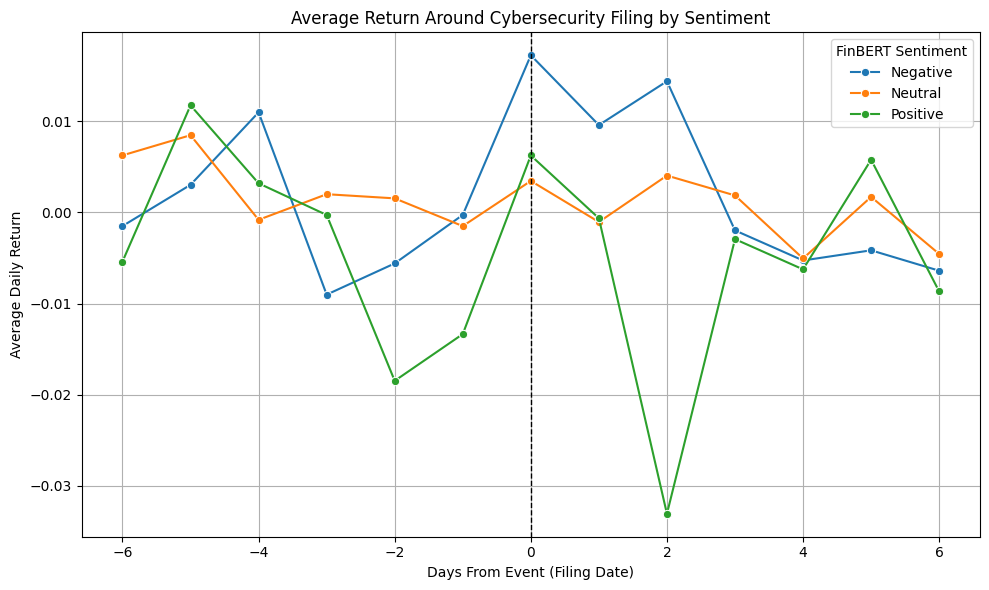

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your final data (already contains DaysFromEvent, Return, sentiment)
df = pd.read_csv("final_merged_cyber_data.csv")

# Filter to a clean event window (e.g., -5 to +5)
df = df[(df["DaysFromEvent"] >= -7) & (df["DaysFromEvent"] <= 7)]

# Clean sentiment label
df["finbert_label"] = df["finbert_label"].str.capitalize()

# Group by event day and sentiment label
event_avg = df.groupby(["DaysFromEvent", "finbert_label"])["Return"].mean().reset_index()

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=event_avg, x="DaysFromEvent", y="Return", hue="finbert_label", marker="o")

# Mark event day
plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.title("Average Return Around Cybersecurity Filing by Sentiment")
plt.xlabel("Days From Event (Filing Date)")
plt.ylabel("Average Daily Return")
plt.grid(True)
plt.legend(title="FinBERT Sentiment")
plt.tight_layout()
plt.show()